# HOTEL BOOKING ANALYSIS
# Bhavesh Jadhav Batch Code: 8220
# Mentor: Rajshri Thete

### Objective: Hotel Booking Data Analysis
### The project aims to extract, analyze, and visualize hotel booking data stored in a MySQL database. By examining booking trends, customer demographics, and behaviors, the project seeks to identify key insights and patterns that can help  to improve business decisions, customer satisfaction, and overall hotel performance.

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# connection to the MySQL database
db_connection = mysql.connector.connect(
    host="localhost",    
    user="root",         
    password="security", 
    database="hotel"     
)df = pd.read_sql(query, db_connection)

In [3]:
# SQL query to select all records from hotel_booking table
query = "SELECT * FROM hotel_booking"
# Load data into a DataFrame
df = pd.read_sql(query, db_connection)

In [4]:
# Data Cleaning: Handle missing values
# Replace NULL values with meaningful defaults
df['children'].fillna(0, inplace=True)
df['company'].fillna('N/A', inplace=True)
df['agent'].fillna('N/A', inplace=True)

In [5]:
# Clean phone numbers and credit card information (anonymizing sensitive data)
df['phone_number'] = df['phone_number'].apply(lambda x: 'REDACTED')
df['credit_card'] = df['credit_card'].apply(lambda x: 'REDACTED')

In [6]:
# Convert the 'reservation_status_date' to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [7]:
# Display cleaned DataFrame
print(df.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        342               2015               July   
2  Resort Hotel            0        737               2015               July   
3  Resort Hotel            0          7               2015               July   
4  Resort Hotel            0         13               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1   

In [8]:
print(df.tail())

           hotel  is_canceled  lead_time  arrival_date_year  \
47    City Hotel            1         35               2023   
48  Resort Hotel            0         95               2023   
49    City Hotel            0         50               2021   
50  Resort Hotel            1         70               2020   
51    City Hotel            0        105               2023   

   arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
47          September                        27                         12   
48              March                        27                         30   
49           November                        27                         15   
50            October                        27                         28   
51           December                        27                         12   

    stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
47                        1                     3       2  ...      Tra

 # Number of Cancellations per Hotel Type
# This visualization shows the number of cancellations in each hotel type:

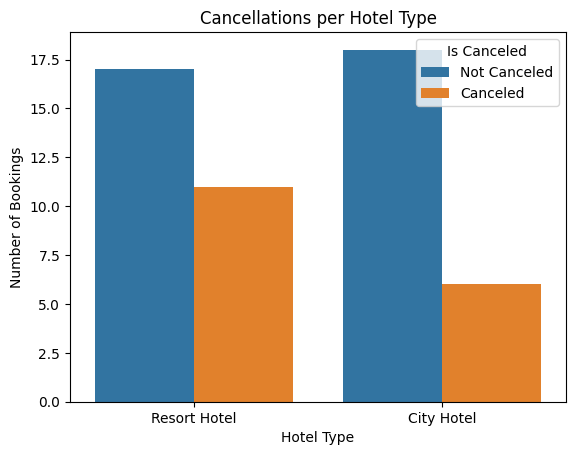

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for cancellations per hotel type
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.title('Cancellations per Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.legend(title="Is Canceled", labels=['Not Canceled', 'Canceled'])
plt.show()

###  Conclusion: The bar plot reveals which hotel types have higher cancellation rates. By identifying these patterns, management can focus on strategies to reduce cancellations for specific hotel types, such as improving customer service or offering flexible booking options.

# Average Daily Rate (ADR) Distribution by Reservation Status
# This visualization shows the ADR distribution by reservation status (Check-Out or Canceled):

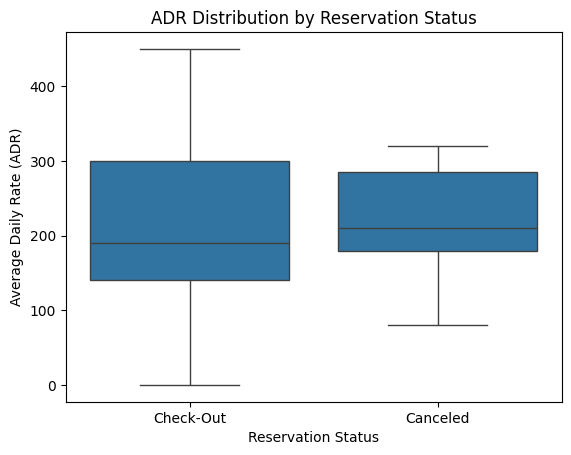

In [10]:
# Box plot for ADR distribution by reservation status
sns.boxplot(data=df, x='reservation_status', y='adr')
plt.title('ADR Distribution by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

### Conclusion : Higher ADR for completed bookings suggests effective pricing strategies, and understanding cancellation reasons can help reduce them and increase revenue.

 # Booking Cancellations by Market Segment
# This shows how cancellations vary across different market segments:

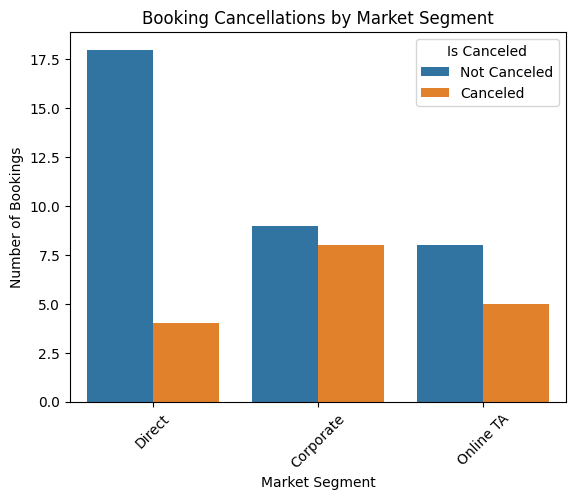

In [12]:
# Bar plot for cancellations per market segment
sns.countplot(data=df, x='market_segment', hue='is_canceled')
plt.title('Booking Cancellations by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.legend(title="Is Canceled", labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.show()

### Conclusion: This visualization shows which market segments have the highest cancellation rates. By focusing on these segments with specific marketing strategies or incentives, hotels can lower cancellations and improve customer loyalty.

 # Total Bookings by Hotel Type (Bar Chart)
# This bar chart will show how many total bookings were made for each hotel type.

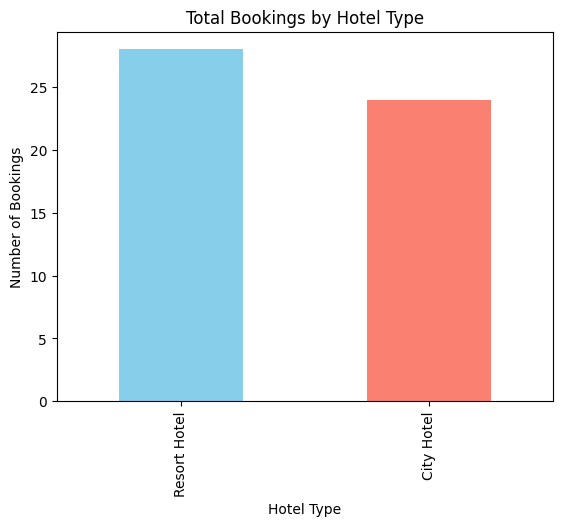

In [13]:
# Count of total bookings by hotel type
hotel_counts = df['hotel'].value_counts()

# Simple bar chart for total bookings by hotel type
hotel_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()

### Conclusion: The bar chart shows the most popular hotel types based on how many bookings they received. This information helps hotels focus their marketing efforts and allocate resources effectively, ensuring that popular hotels get the support they need while rethinking strategies for less popular ones.

# Cancellations vs. Non-Cancellations (Pie Chart)
# This pie chart shows the proportion of bookings that were canceled vs. not canceled.

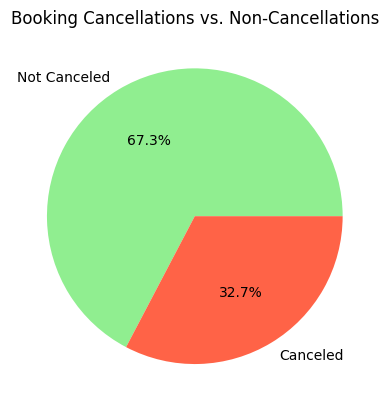

In [14]:
# Pie chart for cancellation distribution
cancellation_counts = df['is_canceled'].value_counts()
labels = ['Not Canceled', 'Canceled']

plt.pie(cancellation_counts, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'tomato'])
plt.title('Booking Cancellations vs. Non-Cancellations')
plt.show()

### Conclusion:The pie chart shows the ratio of cancellations to non-cancellations. A high cancellation rate indicates that hotels should investigate why guests cancel and consider improving the booking experience to encourage more guests to follow through with their reservations.

 # Average Lead Time by Hotel Type (Bar Chart)
# This bar chart shows the average lead time (days) for each hotel type.

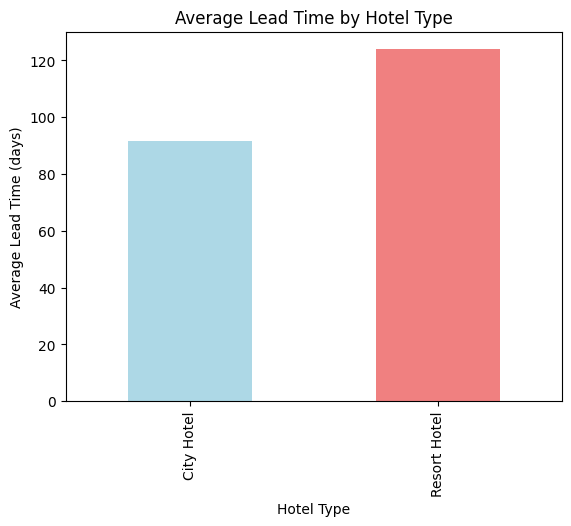

In [15]:
# Calculate average lead time per hotel
average_lead_time = df.groupby('hotel')['lead_time'].mean()
# Bar chart for average lead time by hotel type
average_lead_time.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Average Lead Time by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Lead Time (days)')
plt.show()

 ### Conclusion: The bar chart shows the average lead time for different hotel types. Knowing the lead time helps hotels predict demand and plan accordingly. Hotels with shorter lead times may need to be more flexible to handle last-minute bookings.

# Monthly Booking Trends (Line Chart)
# This line chart shows how bookings change month-to-month throughout the year.

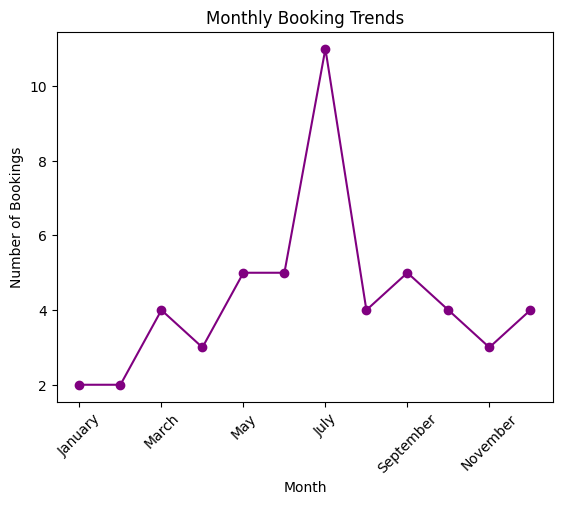

In [16]:
# Group by arrival month and count bookings
monthly_bookings = df['arrival_date_month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Line chart for monthly booking trends
monthly_bookings.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

### Conclusion: The line chart shows monthly booking trends throughout the year. By recognizing these patterns, hotels can adjust their operations, plan promotions, and prepare for busy periods while managing slower months effectively.

# conclusion
 ### Overall, these visualizations are helpful for hotel management in making informed decisions. By using insights from this data, hotels can improve operations, enhance customer experiences, and increase profits. Understanding booking trends will be key to achieving long-term growth and success in the hospitality industry.